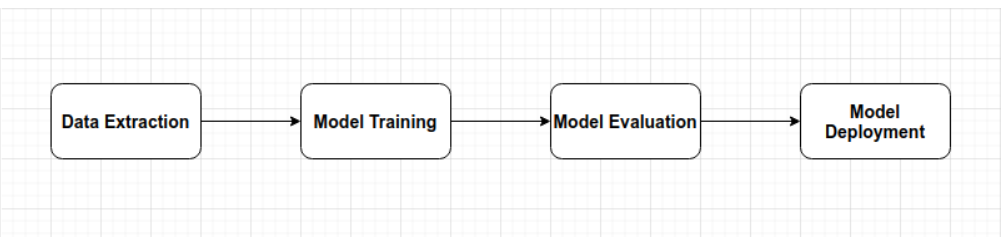

In [1]:
import pandas as pd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", 
                 header=None, names=['StaAcc', 'DuMon', 'CredHis', 'Purpose', 'CredAmt', 'SavAcc', \
                                     'PreEmpl', 'InsRt', 'PerSta', 'OthDebtor', 'PreRe', 'Property', \
                                     'Age', 'IntPla', 'Housing', 'ExstCredit', 'Job', 'NoMain', 'Phone', 'ForWorker', "Response"], 
                 index_col=None, sep=" ")
df.head()

,StaAcc,DuMon,CredHis,Purpose,CredAmt,SavAcc,PreEmpl,InsRt,PerSta,OthDebtor,...,Property,Age,IntPla,Housing,ExstCredit,Job,NoMain,Phone,ForWorker,Response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StaAcc      1000 non-null   object
 1   DuMon       1000 non-null   int64 
 2   CredHis     1000 non-null   object
 3   Purpose     1000 non-null   object
 4   CredAmt     1000 non-null   int64 
 5   SavAcc      1000 non-null   object
 6   PreEmpl     1000 non-null   object
 7   InsRt       1000 non-null   int64 
 8   PerSta      1000 non-null   object
 9   OthDebtor   1000 non-null   object
 10  PreRe       1000 non-null   int64 
 11  Property    1000 non-null   object
 12  Age         1000 non-null   int64 
 13  IntPla      1000 non-null   object
 14  Housing     1000 non-null   object
 15  ExstCredit  1000 non-null   int64 
 16  Job         1000 non-null   object
 17  NoMain      1000 non-null   int64 
 18  Phone       1000 non-null   object
 19  ForWorker   1000 non-null   object
 20  Response 

In [3]:
df.describe()

,DuMon,CredAmt,InsRt,PreRe,Age,ExstCredit,NoMain,Response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


number of numeric field:  8


C:\Users\phanp\AppData\Local\Temp\ipykernel_14836\2018122576.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
C:\Users\phanp\AppData\Local\Temp\ipykernel_14836\2018122576.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
C:\Users\phanp\AppData\Local\Temp\ipykernel_14836\20

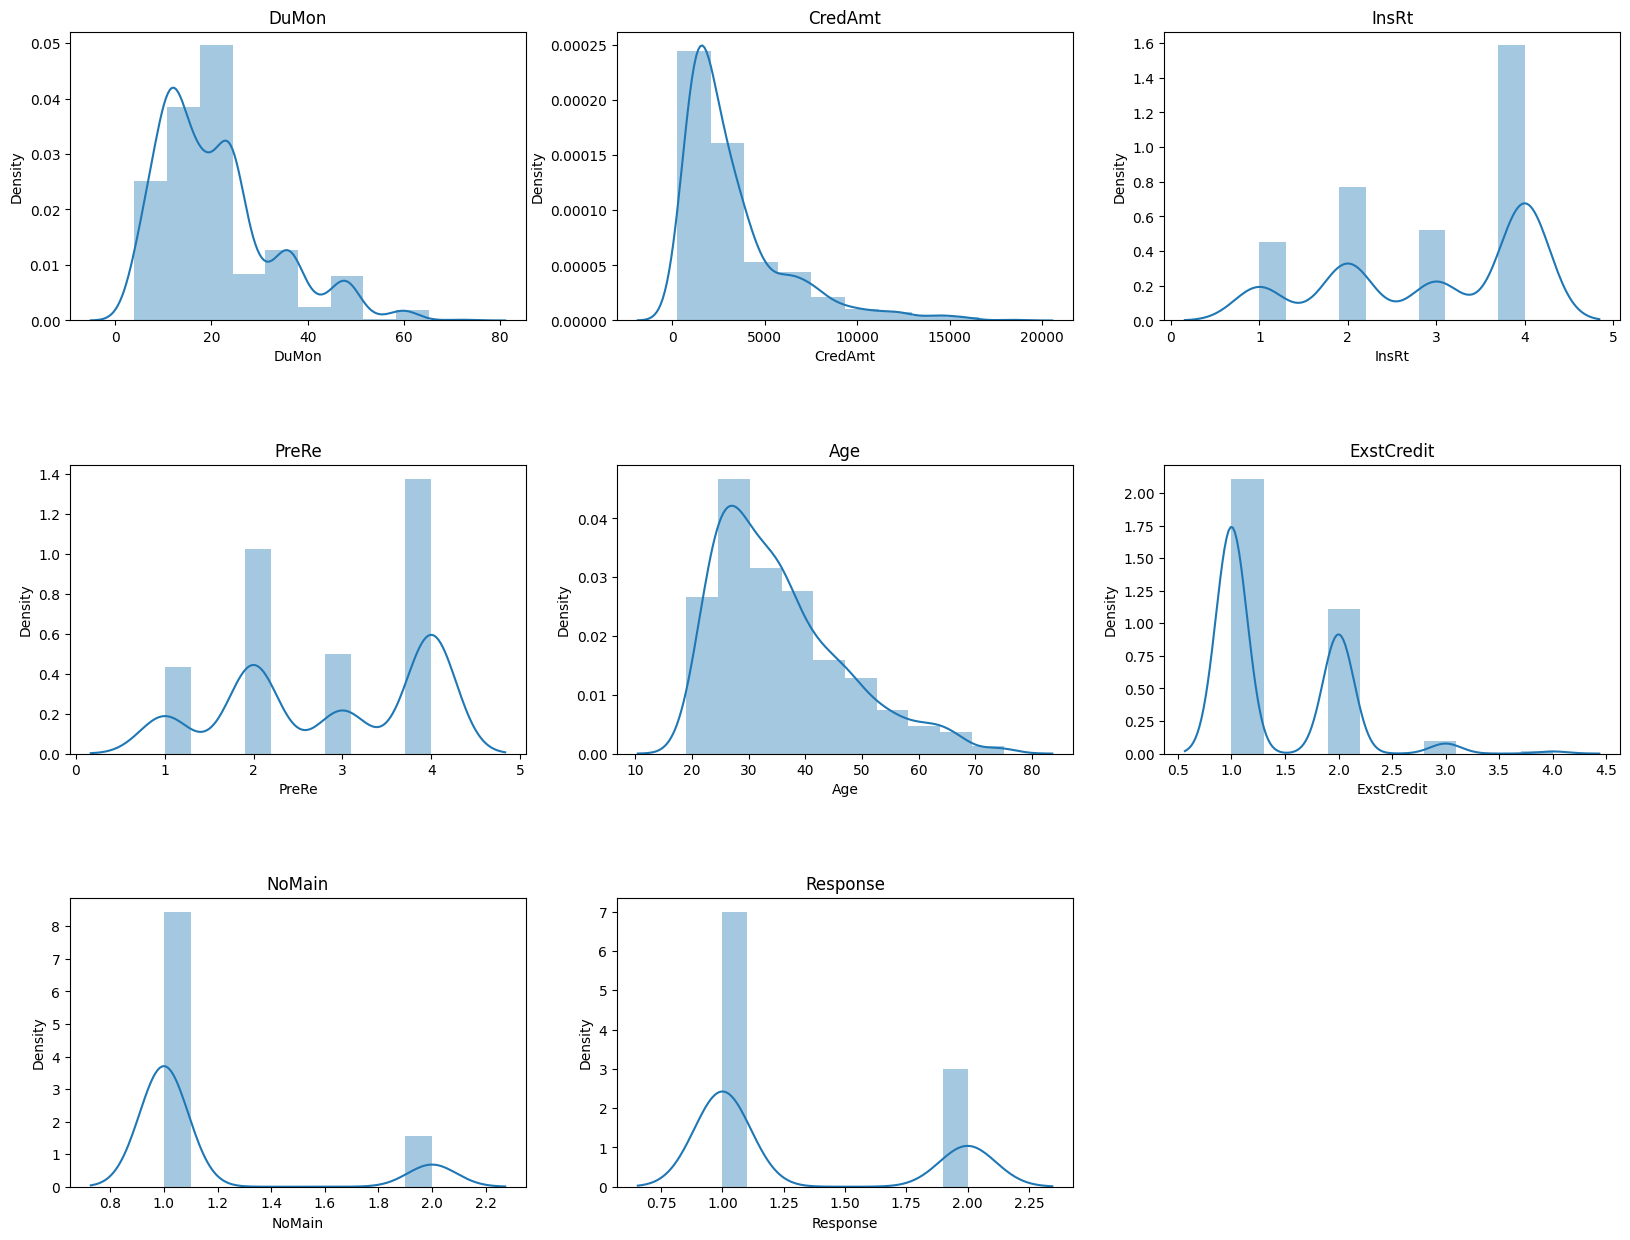

In [6]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols);


number of category field:  13


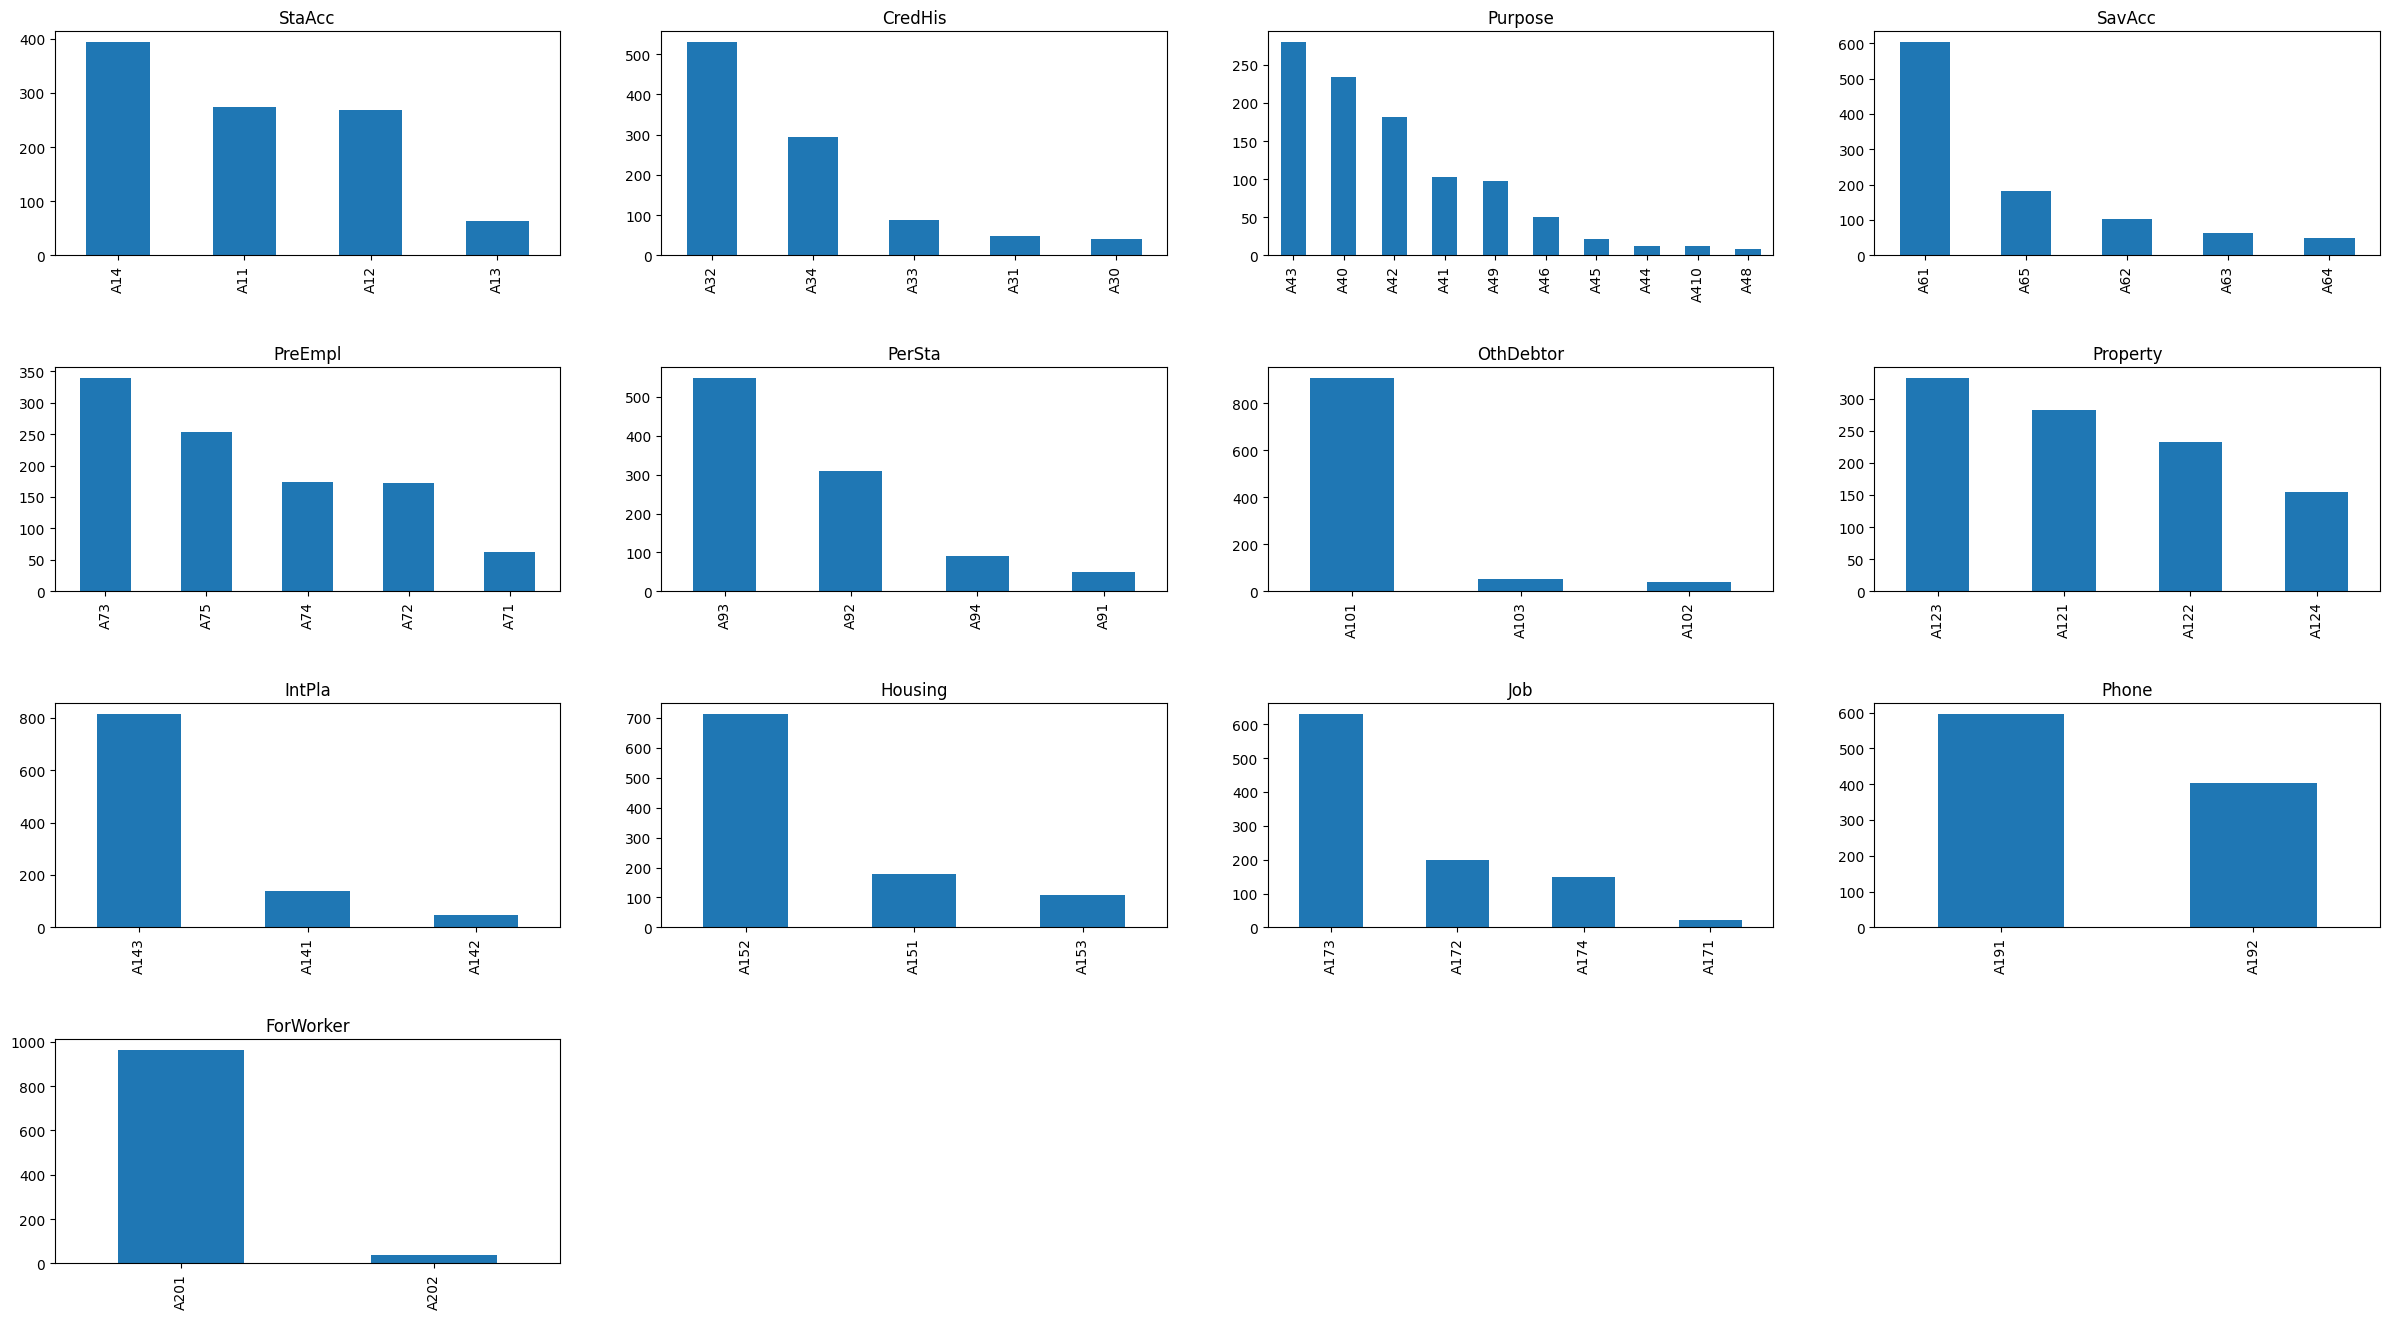

In [7]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

---
Phân chia tập train/val/test

In [11]:
from sklearn.model_selection import train_test_split

# Chia train/test theo ty le 80:20
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['Response'])
X_train = df_train.copy()
y_train = X_train.pop("Response")

X_test = df_test.copy()
y_test = X_test.pop("Response")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(800, 20) (800,)
(200, 20) (200,)


---
Tách biệt xử lý cho biến liên tục và biến phân loại


In [13]:
# lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)
cat_names, num_names


(['StaAcc',
  'CredHis',
  'Purpose',
  'SavAcc',
  'PreEmpl',
  'PerSta',
  'OthDebtor',
  'Property',
  'IntPla',
  'Housing',
  'Job',
  'Phone',
  'ForWorker'],
 ['DuMon', 'CredAmt', 'InsRt', 'PreRe', 'Age', 'ExstCredit', 'NoMain'])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#Pipeline xử lý cho biến phân loại
cat_pl = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy = 'most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị củ biến phân loại thành vector OneHot
    ]
)

In [15]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps= [
        ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7
        ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

In [17]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers= [
        ('num', num_pl, num_names), # Áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

---
### Pipeline hoàn chỉnh

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Completed training pipeline
completed_pl = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ("classifier", RandomForestClassifier())
    ]
)

# training 
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on train: {accuracy_score(list(y_test), list(y_pred)):.2f}" )

Accuracy on train: 1.00
Accuracy on train: 0.76


---
---
### Đánh giá cheó (cross validation)

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

Tức là một trường hợp False Negative có mức độ sai lầm bằng 5 trường hợp False Positive nên ta sẽ lựa chọn B^2 = 5

In [19]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import numpy as np

# Tính fbeta score
def fbeta(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta = np.sqrt(5))

Để thực hiện cross validation chúng ta sử dụng class RepeatedStratifiedKFold() với n_splits là số lần chia dữ liệu và n_repeates là số lần lặp lại quá trình cross validation. Như vậy chúng ta sẽ có tổng cộng n_splits x n_repeats = 30 lượt đánh giá dữ liệu.

Hàm cross_val_score() sẽ được sử dụng để tính toán thước đo mô hình trên các lượt huấn luyện.

In [20]:
## Thực hiện cross validation
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# xac dinh KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xac dinh metric cho mo hinh
metric = make_scorer(fbeta)
# Danh gia mo hinh
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv = cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'. format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.892 0.024


---
### Đánh giá nhiều mô hình

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# list các mô hình được lựa chọn
models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

all_scores = []
# Xác định KFold đã chia
for model in models:
    completed_pl = Pipeline(
        steps=[("preprocessor", preprocessor),
               ('classifier', model)]
    )
    scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv = cv, n_jobs=-1)
    all_scores.append(scores)

Text(0.5, 1.0, 'Scores metrics')

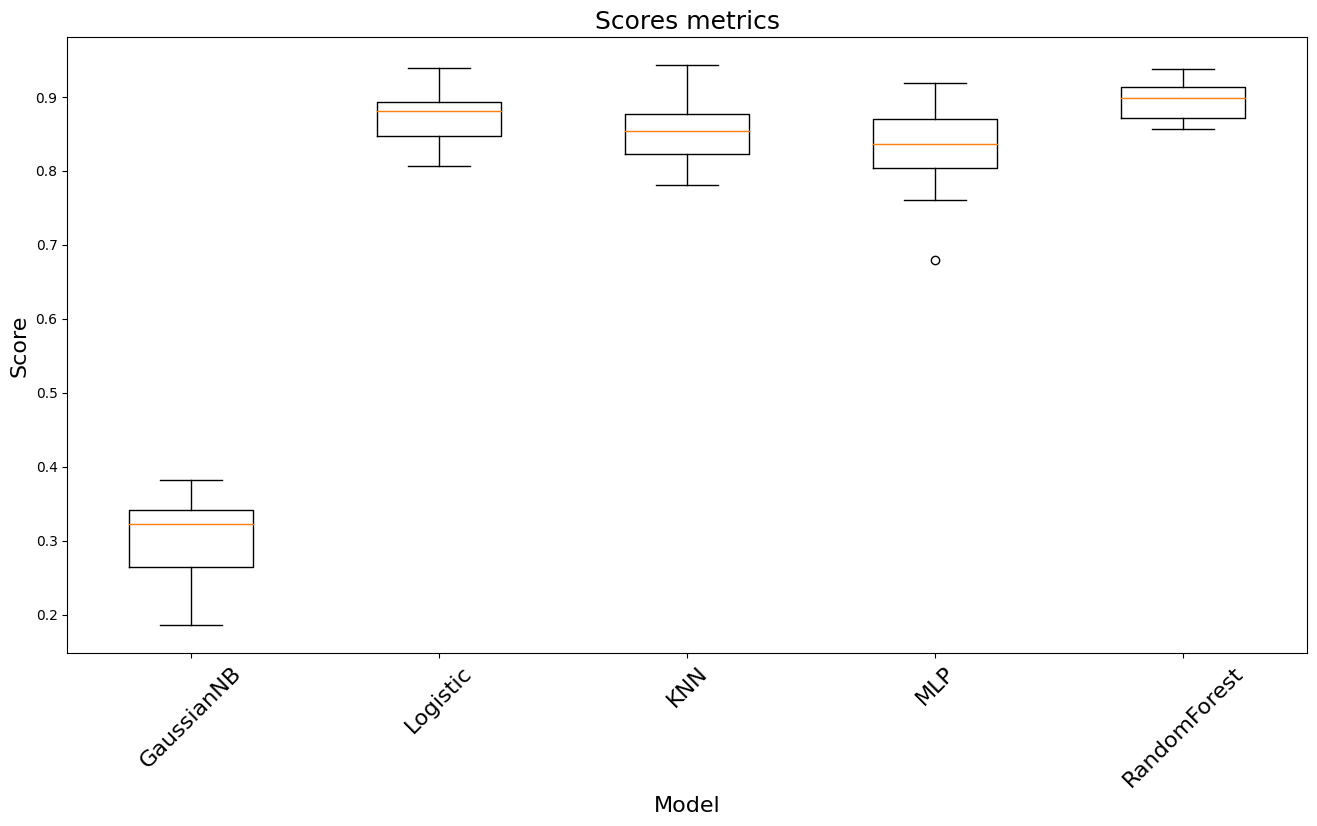

In [22]:
model_names = ['GaussianNB', 'Logistic', 'KNN', "MLP", 'RandomForest']

# Draw boxplot
plt.figure(figsize=(16,8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize = 16)
plt.ylabel('Score', fontsize =16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation = 45, fontsize =16)
plt.title('Scores metrics', fontsize =18)

---
---
### GridSearch

In [23]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [24]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

In [26]:
parameters = [
    {
        'clf__estimator': [LogisticRegression()], # SVM if hinge loss / logreg if log loss
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

Giải thích một chút: Bạn không hiểu clf__estimator__penalty nghĩa là gì phải không? Bởi vì parameters sẽ được thông dịch trước khi đưa vào gridsearch nên dấu __ ở trên chính là dấu . sau khi thông dịch. Như vậy clf__estimator__penalty chính là clf.estimator.penalty.

In [27]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\phanp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\phanp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\phanp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\phanp\AppData\Local\Temp\ipykernel_14836\3350716100.py", 

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['DuMon',
                                                                          'CredAmt',
                                                                          'InsRt',
                                                                          'PreRe',
                                                                          'Age',
                                                                          'ExstCredit',
                                                                          'NoMain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(...
                          'clf__estimator__max_iter': [50, 80],
                          'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
                          'clf__estimator__tol': [0.0001]},
                         {'clf__estimator': [RandomForestClassifier(criterion='entropy',
                                                                    max_depth=5)],
                          'clf__estimator__criterion': ('gini', 'entropy'),
                          'clf__estimator__max_depth': [5, 10],
                          'clf__estimator__n_estimators': [50, 100]}],
             return_train_score=True, scoring=make_scorer(fbeta), verbose=3)

In [28]:
gscv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['DuMon', 'CredAmt', 'InsRt',
                                                   'PreRe', 'Age', 'ExstCredit',
                                                   'NoMain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['StaAcc', 'CredHis',
                                                   'Purpose', 'SavAcc',
                                                   'PreEmpl', 'PerSta',
                                                   'OthDebtor', 'Property',
                                                   'IntPla', 'Housing', 'Job',
                                                   'Phone', 'ForWorker'])])),
                ('clf',
                 ClassifierSwitcher(estimator=RandomForestClassifier(criterion='entropy',
                                                                     max_depth=5)))])

In [29]:
gscv.best_params_

{'clf__estimator': RandomForestClassifier(criterion='entropy', max_depth=5),
 'clf__estimator__criterion': 'entropy',
 'clf__estimator__max_depth': 5,
 'clf__estimator__n_estimators': 100}

In [30]:
gscv.best_score_

0.9268873926912441